Q1) Forecast the Airline Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import file
data = pd.read_excel("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Forecasting/Airlines+Data..xlsx",engine='openpyxl')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
#Make year and month column separarly
from datetime import datetime
month=[]
year=[]
for x in data["Month"]:
    m=x.month
    month.append(m)
    y=x.year
    year.append(y)
month=pd.DataFrame(month)
year=pd.DataFrame(year)
month.columns=['month']
year.columns=['year']
z=month.join(year)

In [4]:
replace_values = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar',4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec" }    
z=z.replace({'month':replace_values})
data=data.join(z)
data.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


#### Transformation

In [5]:
data["Log_Passengers"]=np.log(data.Passengers)
data["t"]=range(1,97)
data["t_square"]=data.t*data.t
data.head()

,Month,Passengers,month,year,Log_Passengers,t,t_square
0,1995-01-01,112,Jan,1995,4.718499,1,1
1,1995-02-01,118,Feb,1995,4.770685,2,4
2,1995-03-01,132,Mar,1995,4.882802,3,9
3,1995-04-01,129,Apr,1995,4.859812,4,16
4,1995-05-01,121,May,1995,4.795791,5,25


In [6]:
# Create dummy variable by using one hot encoding method 
M_dummy=pd.get_dummies(data['month'])
M_dummy=pd.DataFrame(M_dummy)
M_dummy=M_dummy[['Jan']+['Feb']+['Mar']+["Apr"]+["May"]+["Jun"]+["Jul"]+["Aug"]+["Sep"]+["Oct"]+["Nov"]+["Dec"]]
M_dummy

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [7]:
# join dummy columns in data set
data1=data.join(M_dummy)
data1.head()

,Month,Passengers,month,year,Log_Passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1995,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,1995,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


#### Visualization

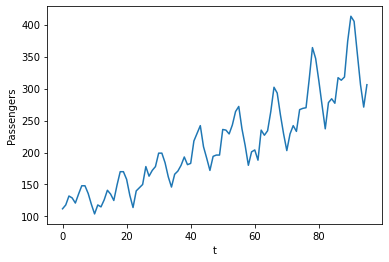

In [8]:
data1.Passengers.plot()
plt.ylabel("Passengers")
plt.xlabel("t")
plt.show()

Interpretation: from above fig, there is upword trend with multiplicative seasonality

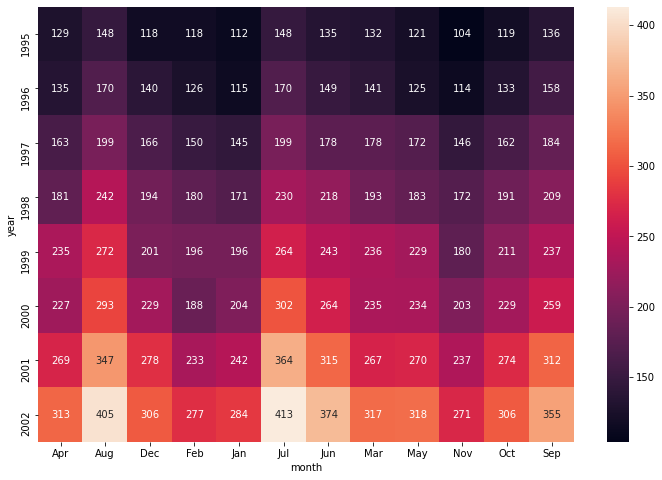

In [9]:
# Heatmap of Airline Pasengers data
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

Interpretation: from the above fig., In July 2002, there are highest passengers(413)

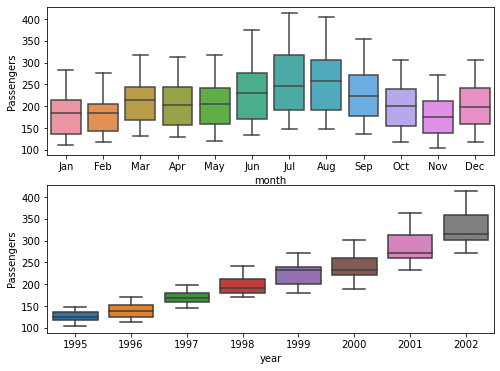

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data1)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data1)
plt.show()

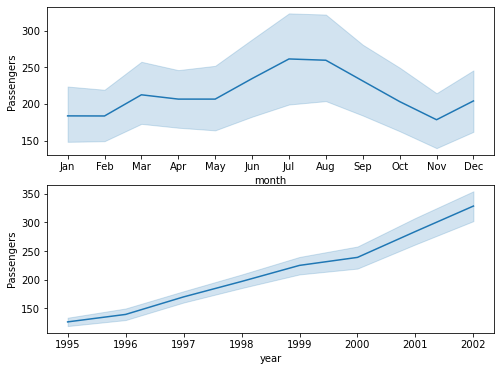

In [11]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.lineplot(x="month",y="Passengers",data=data1)
plt.subplot(212)
sns.lineplot(x="year",y="Passengers",data=data1)
plt.show()

Interpretation : from the above plots, More number of passanger prefer to use airline from july to august and number of passernger get increased year by year

In [12]:
data1.head()

,Month,Passengers,month,year,Log_Passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1995,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,1995,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


#### Splitting data

In [13]:
Train = data1.head(77)
Test = data1.tail(19)

# Forecasting Model Based Methods

In [14]:
#Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.14854431950882

In [15]:
#Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.88965425184036

In [16]:
#Quadratic Model
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.926328528188264

In [17]:
#Additive seasonality Model
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

133.3154036011272

In [18]:
#Additive Seasonality Quadratic Model
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.61752923079039

In [19]:
##Multiplicative Seasonality Model
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

138.7571524741709

In [20]:
#Multiplicative Additive Seasonality Model
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

12.183266271786405

In [21]:
#multiplicative seasonality with quadratic trend Model
Mul_Quad= smf.ols('Log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_Mul_quad= pd.Series(Mul_Quad.predict(Test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mul_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mul_quad)))**2))
rmse_Mul_quad

34.68847395069886

In [22]:
#Compare the results 
data = {"MODEL":pd.Series(["Linear Model","Exponential","Quadratic","Additive seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Multiplicative Additive Seasonality ","multiplicative seasonality with quadratic trend"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mul_quad]),"Dummy_Variables":pd.Series(["--","--","--","11","11","11","11","11"])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,Dummy_Variables
6,Multiplicative Additive Seasonality,12.183266,11
7,multiplicative seasonality with quadratic trend,34.688474,11
4,Additive Seasonality Quadratic,39.617529,11
1,Exponential,47.889654,--
0,Linear Model,58.148544,--
2,Quadratic,58.926329,--
3,Additive seasonality,133.315404,11
5,Multiplicative Seasonality,138.757152,11


#### Interpretation: From above table,"Multiplicative Additive Seasonality Model" with lowest RMSE value (12.183266271786405) is best to do forecasting 

# Forecasting Data Driven Model

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Moving Average

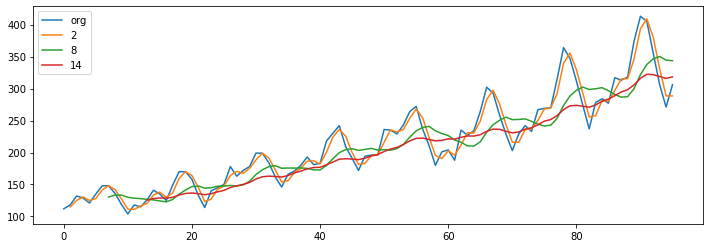

In [24]:
plt.figure(figsize=(12,4))
data1.Passengers.plot(label="org")
for i in range(2,20,6):
    data1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

#### Time series decomposition plot 


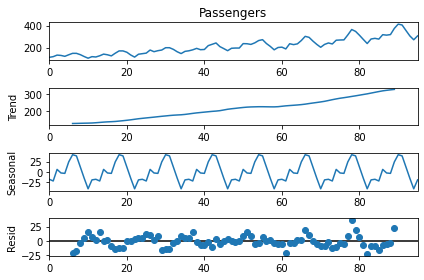

In [25]:
decompose_ts_add = seasonal_decompose(data1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

#### ACF(corologram) and PACF plot

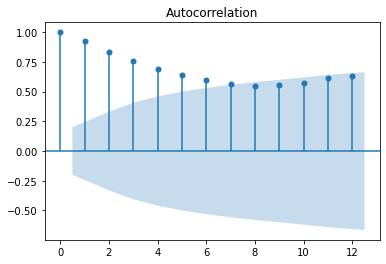

In [26]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.Passengers,lags=12)
plt.show()

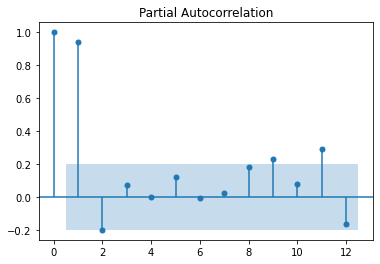

In [27]:
tsa_plots.plot_pacf(data1.Passengers,lags=12)
plt.show()

### Evaluation Metric MAPE(mean absolute percentage error)

In [28]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Smoothing

In [29]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

D:\anaconda\installation\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


19.907063237282795

### Double Exponential Smoothing (Holt's method)

In [30]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-30-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


12.68028130202543

### Holts winter exponential smoothing with additive seasonality and additive trend


In [31]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

8.141970848838946

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

8.521261701421126

## Final Model by combining train and test

In [33]:
hwe_model_mul_add = ExponentialSmoothing(data1["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [34]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
101    392.472018
102    436.501550
103    429.860620
104    380.172862
105    332.318642
dtype: float64

# ARIMA Model

In [35]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
# Import file
data = pd.read_excel("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Forecasting/Airlines+Data..xlsx",engine='openpyxl')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [37]:
Modified_data=data.set_index(keys=["Month"],drop=True)
Modified_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


#### Visualization

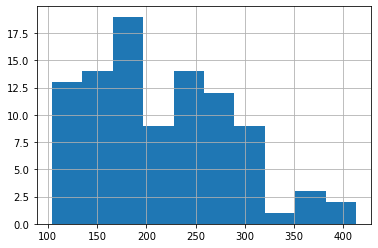

In [38]:
data["Passengers"].hist()
plt.show()

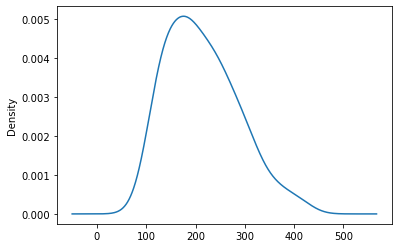

In [39]:
data["Passengers"].plot(kind='kde')
plt.show()

Interpretation: from above plot, data is slightly towords normal

In [40]:
# separate out a validation dataset
split_point = len(Modified_data) - 10
dataset, validation = Modified_data[0:split_point], Modified_data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_Airline.csv', header=False)
validation.to_csv('validation1_Airline.csv', header=False)

Dataset 86, Validation 10


### Persistence/ Base model

In [41]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset_Airline.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values

In [42]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [43]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

#### ARIMA Hyperparameters

In [44]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values


In [45]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [46]:
# load dataset
train = read_csv('dataset_Airline.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.563
ARIMA(0, 0, 1) RMSE=44.789
ARIMA(0, 1, 0) RMSE=25.903
ARIMA(0, 1, 1) RMSE=25.355
ARIMA(0, 1, 2) RMSE=27.772
ARIMA(0, 1, 3) RMSE=23.806
ARIMA(0, 1, 4) RMSE=22.640
ARIMA(0, 2, 0) RMSE=32.474
ARIMA(0, 2, 1) RMSE=26.640
ARIMA(0, 2, 2) RMSE=25.942
ARIMA(0, 2, 3) RMSE=27.914
ARIMA(0, 2, 4) RMSE=25.151
ARIMA(1, 0, 0) RMSE=26.036
ARIMA(1, 0, 1) RMSE=25.282
ARIMA(1, 0, 2) RMSE=455.575
ARIMA(1, 1, 0) RMSE=25.679
ARIMA(1, 2, 0) RMSE=31.603
ARIMA(2, 0, 0) RMSE=25.620
ARIMA(2, 1, 0) RMSE=25.467
ARIMA(2, 2, 0) RMSE=30.414
ARIMA(3, 0, 0) RMSE=25.510
ARIMA(3, 0, 1) RMSE=24.907
ARIMA(3, 1, 0) RMSE=25.648
ARIMA(3, 2, 0) RMSE=30.597
ARIMA(4, 0, 0) RMSE=25.764
ARIMA(4, 1, 0) RMSE=25.344
ARIMA(4, 2, 0) RMSE=29.205
ARIMA(4, 2, 1) RMSE=26.016
Best ARIMA(0, 1, 4) RMSE=22.640


#### Build Model based on the optimized values

In [47]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [48]:
# prepare data
X = train.values
X = X.astype('float32')

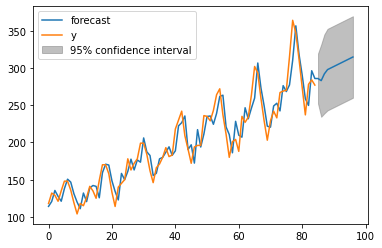

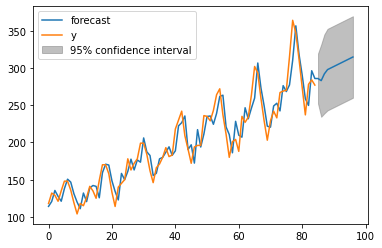

In [49]:
# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 97)

In [50]:
#Error on the test data
val=pd.read_csv('validation1_Airline.csv',header=None)
rmse = np.sqrt(mean_squared_error(val[1], forecast))
rmse

59.79472072057499

In [51]:
forecast

array([285.79592748, 282.99938541, 292.11240751, 297.78300398,
       299.89970192, 302.01639987, 304.13309782, 306.24979576,
       308.36649371, 310.48319165])

#### Combine train and test data and build final model


In [52]:
# fit model
data = pd.read_excel("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Forecasting/Airlines+Data..xlsx",engine='openpyxl')
# prepare data
y=Modified_data.values
pred=y.astype('float32')

In [53]:
model = ARIMA(pred, order=(0,1,4))
model_fit = model.fit()

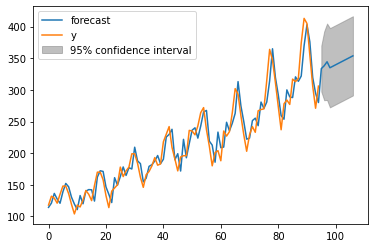

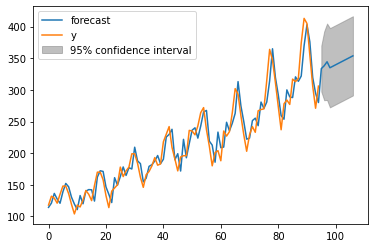

In [54]:
forecast_final=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,107)

In [55]:
#Error on the whole data
val=pd.read_csv('validation1_Airline.csv',header=None)
rmse = np.sqrt(mean_squared_error(val[1], forecast_final))
rmse

47.281787203776126

In [56]:
#Forecasting for next 10 time periods
forecast_final

array([333.64541868, 338.10561738, 344.47640726, 334.99091697,
       337.34157319, 339.69222941, 342.04288563, 344.39354185,
       346.74419807, 349.09485429])